Visualization of dataset


In [42]:
import pandas as pd

# Load the CSV file
data_path = r"C:\Users\Gebruiker\Downloads\Filtered_Rookie_Data.csv"
filtered_rookie_data = pd.read_csv(data_path)

# View the first few rows
filtered_rookie_data.head()


,Player,Age,G,FG%,3P%,FT%,PER GAME MP,PER GAME PTS,PER GAME TRB,PER GAME AST,...,PER GAME TOV,All-League Team,Rookie of the Year,Defensive Award Winner,MVP Winner,Finals MVP Winner,success,Success_Class,high_success,Low_Success
0,victor wembanyama,20,52,0.467,0.318,0.813,28.5,20.7,10.1,3.3,...,3.4,0,1,1,0,0,2,High Success,1,0
1,paolo banchero,20,72,0.427,0.298,0.738,33.8,20.0,6.9,3.7,...,2.8,0,1,0,0,0,1,Low Success,0,1
2,scottie barnes,20,74,0.492,0.301,0.735,35.4,15.3,7.5,3.5,...,1.8,0,1,0,0,0,1,Low Success,0,1
3,herbert jones,23,78,0.476,0.337,0.840,29.9,9.5,3.8,2.1,...,1.3,0,0,1,0,0,1,Low Success,0,1
4,evan mobley,20,69,0.508,0.250,0.663,33.8,15.0,8.3,2.5,...,1.9,0,0,1,0,0,1,Low Success,0,1


Shape of the dataset: (274, 22)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  274 non-null    object 
 1   Age                     274 non-null    int64  
 2   G                       274 non-null    int64  
 3   FG%                     274 non-null    float64
 4   3P%                     274 non-null    float64
 5   FT%                     274 non-null    float64
 6   PER GAME MP             274 non-null    float64
 7   PER GAME PTS            274 non-null    float64
 8   PER GAME TRB            274 non-null    float64
 9   PER GAME AST            274 non-null    float64
 10  PER GAME STL            274 non-null    float64
 11  PER GAME BLK            274 non-null    float64
 12  PER GAME TOV            274 non-null    float64
 13  All-League Team         274 non-null    int64  
 14  Roo

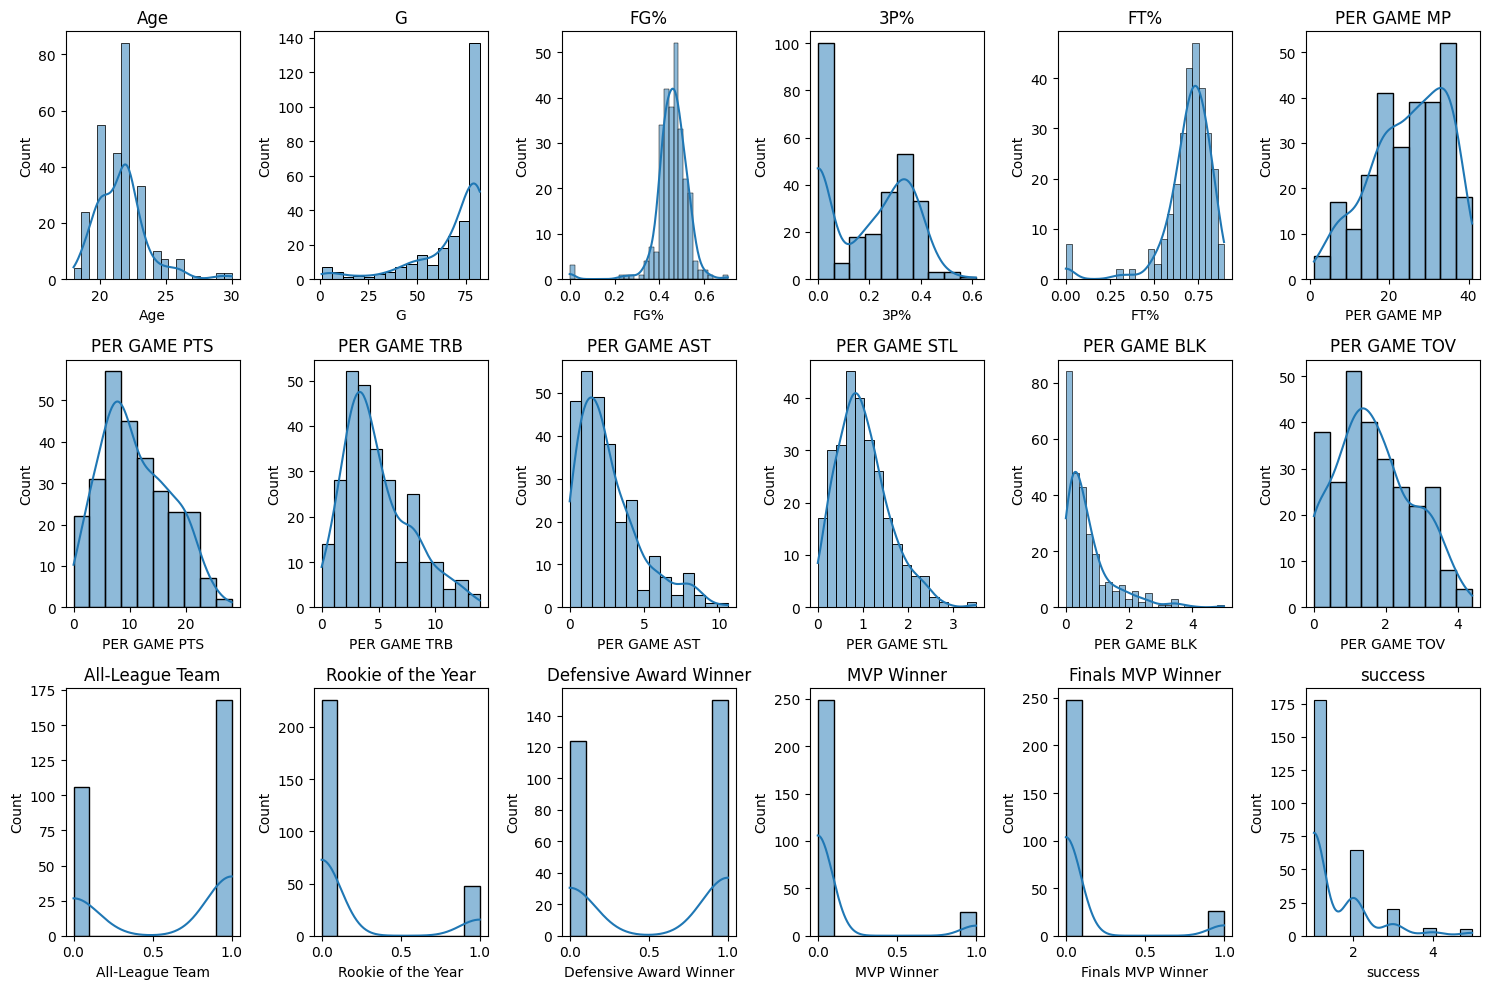

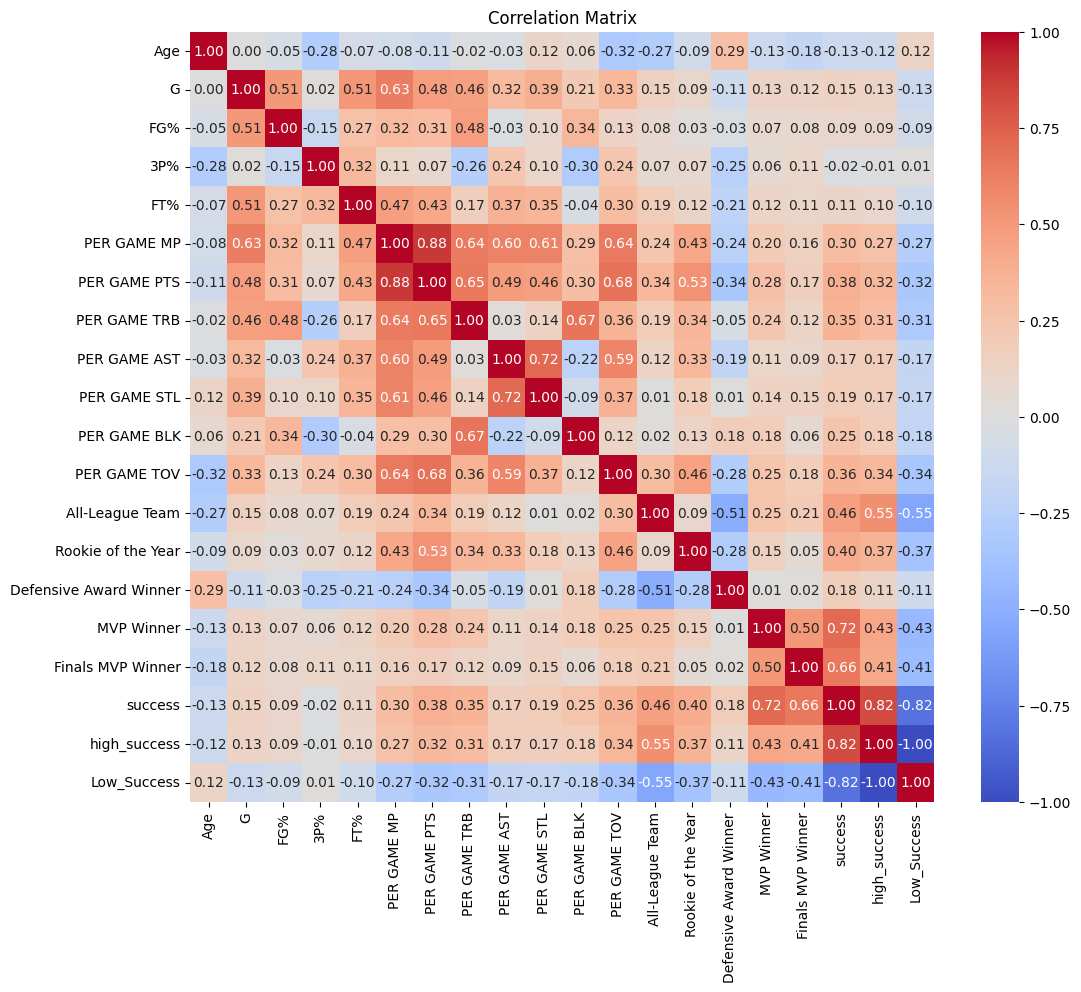

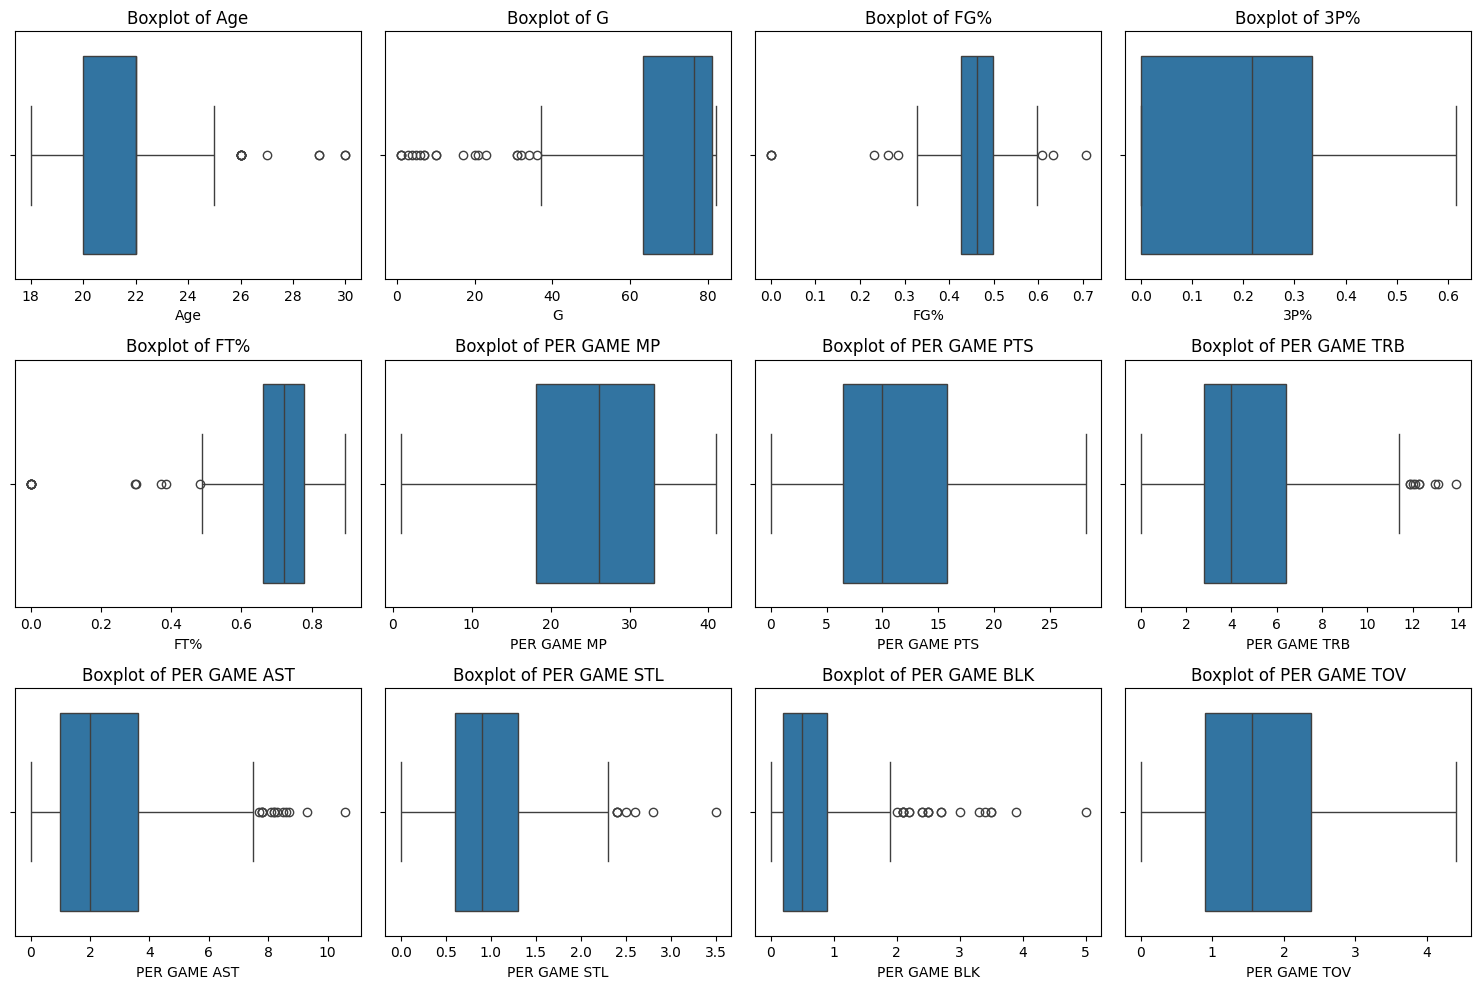

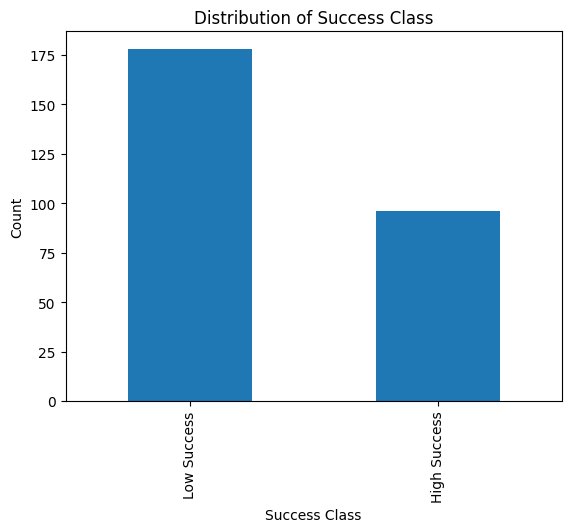

In [45]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Data Overview
print("Shape of the dataset:", filtered_rookie_data.shape)
print("\nInfo:")
print(filtered_rookie_data.info())
print("\nMissing values:")
print(filtered_rookie_data.isnull().sum())
print("\nSummary statistics:")
print(filtered_rookie_data.describe())

# Checking for duplicates
duplicates = filtered_rookie_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Visualizing the distribution of key numeric variables
numeric_cols = filtered_rookie_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:18], start=1):
    plt.subplot(3, 6, i)
    sns.histplot(filtered_rookie_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Checking correlations between variables
plt.figure(figsize=(12, 10))
numeric_cols = filtered_rookie_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = filtered_rookie_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identifying outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:12], start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=filtered_rookie_data, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Analyzing the target variable (Success_Class)
filtered_rookie_data['Success_Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Success Class')
plt.xlabel('Success Class')
plt.ylabel('Count')
plt.show()




In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'Filtered_Rookie_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target variable
X = data[["Age", "G", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS",
          "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]]
y = data["high_success"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_scaled = scaler.transform(X_test)

# Combine X_train and y_train to perform random oversampling
train_data = pd.concat([pd.DataFrame(X_train_scaled), pd.Series(y_train, name='target')], axis=1)

# Drop rows with NaN values
train_data = train_data.dropna()

# Separate the majority and minority classes
majority_class = train_data[train_data['target'] == 0]
minority_class = train_data[train_data['target'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the oversampled minority class with the majority class
oversampled_train_data = pd.concat([majority_class, minority_oversampled])

# Split the data back into features and target
X_train_oversampled = oversampled_train_data.drop('target', axis=1)
y_train_oversampled = oversampled_train_data['target']

# Train and evaluate Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_oversampled, y_train_oversampled)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_oversampled, y_train_oversampled)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Train and evaluate SVM
svm = SVC(random_state=42)
svm.fit(X_train_oversampled, y_train_oversampled)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

# Train and evaluate Gradient Boosting
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_oversampled, y_train_oversampled)
y_pred_gbm = gbm.predict(X_test_scaled)
print("Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gbm))


C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39        37
           1       0.19      0.33      0.24        18

    accuracy                           0.33        55
   macro avg       0.35      0.33      0.32        55
weighted avg       0.40      0.33      0.34        55

Random Forest Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        37
           1       0.46      0.33      0.39        18

    accuracy                           0.65        55
   macro avg       0.59      0.57      0.57        55
weighted avg       0.63      0.65      0.64        55

SVM Report:
              precision    recall  f1-score   support

           0       0.61      0.46      0.52        37
           1       0.26      0.39      0.31        18

    accuracy                           0.44        55
   macro avg       0.43      0.42      0.42        55
weighted avg

feature analysis


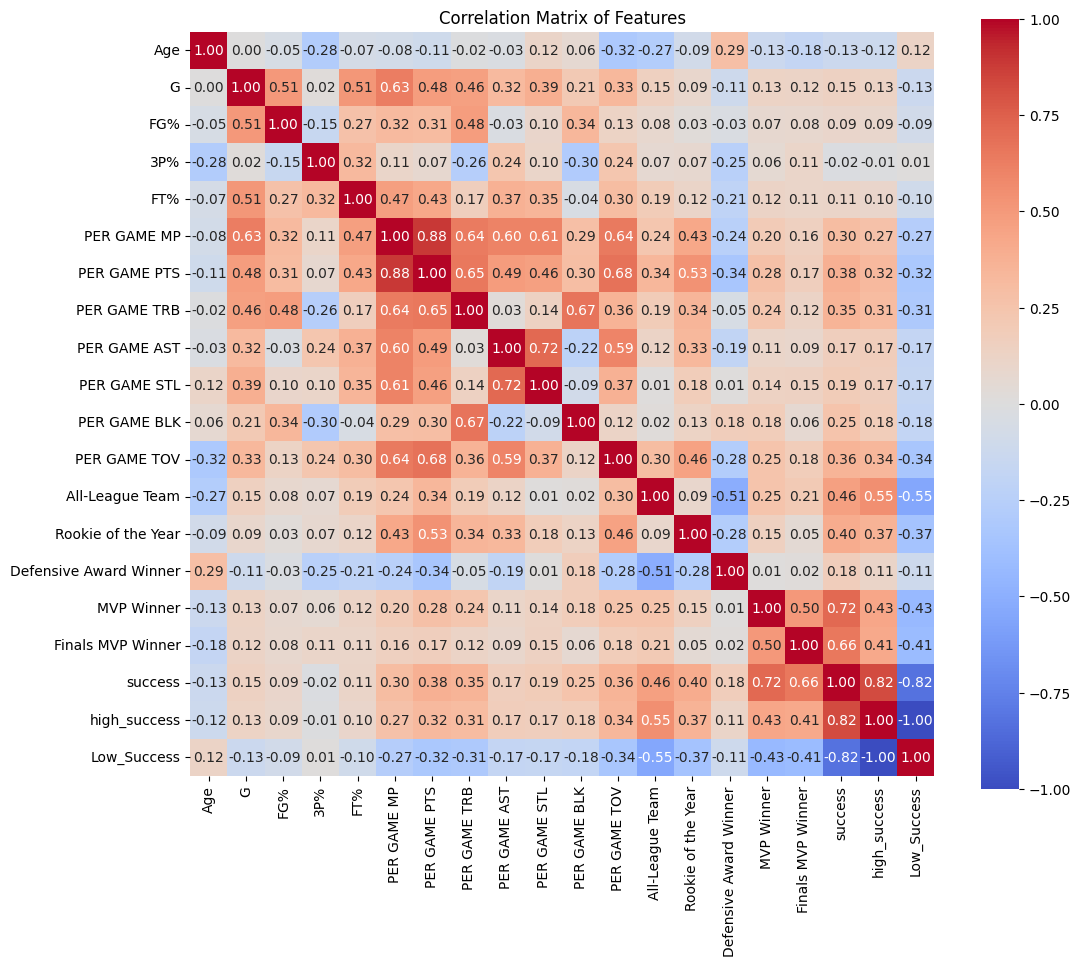

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Filtered_Rookie_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Features")
plt.show()


New models 

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

# Load the dataset
file_path = 'Filtered_Rookie_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target variable
X = data[["Age", "G", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS",
          "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]]
y = data["high_success"]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTEENN on the training set
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smoteenn)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train and evaluate the four models

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_smoteenn)
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_report = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Report:")
print(log_reg_report)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_smoteenn)
y_pred_rf = rf.predict(X_test_scaled)
rf_report = classification_report(y_test, y_pred_rf)
print("Random Forest Report:")
print(rf_report)

# Support Vector Machines (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train_smoteenn)
y_pred_svm = svm.predict(X_test_scaled)
svm_report = classification_report(y_test, y_pred_svm)
print("SVM Report:")
print(svm_report)

# Gradient Boosting
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train_smoteenn)
y_pred_gbm = gbm.predict(X_test_scaled)
gbm_report = classification_report(y_test, y_pred_gbm)
print("Gradient Boosting Report:")
print(gbm_report)



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        37
           1       0.50      0.72      0.59        18

    accuracy                           0.67        55
   macro avg       0.66      0.69      0.66        55
weighted avg       0.72      0.67      0.68        55

Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        37
           1       0.55      0.67      0.60        18

    accuracy                           0.71        55
   macro avg       0.68      0.70      0.69        55
weighted avg       0.73      0.71      0.72        55

SVM Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.59      0.72      0.65        18

    accuracy                           0.75        55
   macro avg       0.72      0.74      0.73        55
weighted avg

hyper tuning


In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

# Load the dataset
file_path = 'Filtered_Rookie_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target variable
X = data[["Age", "G", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS",
          "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]]
y = data["high_success"]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTEENN on the training set
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smoteenn)
X_test_scaled = scaler.transform(X_test)

# Step 4: Hyperparameter tuning for Logistic Regression using GridSearchCV
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), log_reg_params, cv=5)
log_reg.fit(X_train_scaled, y_train_smoteenn)
print(f"Best Logistic Regression Parameters: {log_reg.best_params_}")

# Step 5: Hyperparameter tuning for Random Forest using RandomizedSearchCV
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=50, cv=5, random_state=42)
rf.fit(X_train_scaled, y_train_smoteenn)
print(f"Best Random Forest Parameters: {rf.best_params_}")

# Step 6: Hyperparameter tuning for SVM using GridSearchCV
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
svm = GridSearchCV(SVC(random_state=42), svm_params, cv=5)
svm.fit(X_train_scaled, y_train_smoteenn)
print(f"Best SVM Parameters: {svm.best_params_}")

# Step 7: Hyperparameter tuning for Gradient Boosting using RandomizedSearchCV
gbm_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}
gbm = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gbm_params, n_iter=50, cv=5, random_state=42)
gbm.fit(X_train_scaled, y_train_smoteenn)
print(f"Best Gradient Boosting Parameters: {gbm.best_params_}")

# Step 8: Evaluate all models on the test set
models = {
    "Logistic Regression": log_reg.best_estimator_,
    "Random Forest": rf.best_estimator_,
    "SVM": svm.best_estimator_,
    "Gradient Boosting": gbm.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred))


Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best SVM Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Gradient Boosting Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5, 'learning_rate': 0.1}

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        37
           1       0.48      0.72      0.58        18

    accuracy                           0.65        55
   macro avg       0.65      0.67      0.64        55
weighted avg       0.71      0.65      0.67        55


Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        37
           1       0.55      0.67      0.60        18

    accuracy                           0.71        55
   macro avg       0.68      0.70  

SVM best so do shap on it alone



Using 101 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.62      0.72      0.67        18

    accuracy                           0.76        55
   macro avg       0.74      0.75      0.74        55
weighted avg       0.78      0.76      0.77        55

Confusion Matrix:
[[29  8]
 [ 5 13]]


100%|██████████| 55/55 [01:18<00:00,  1.42s/it]


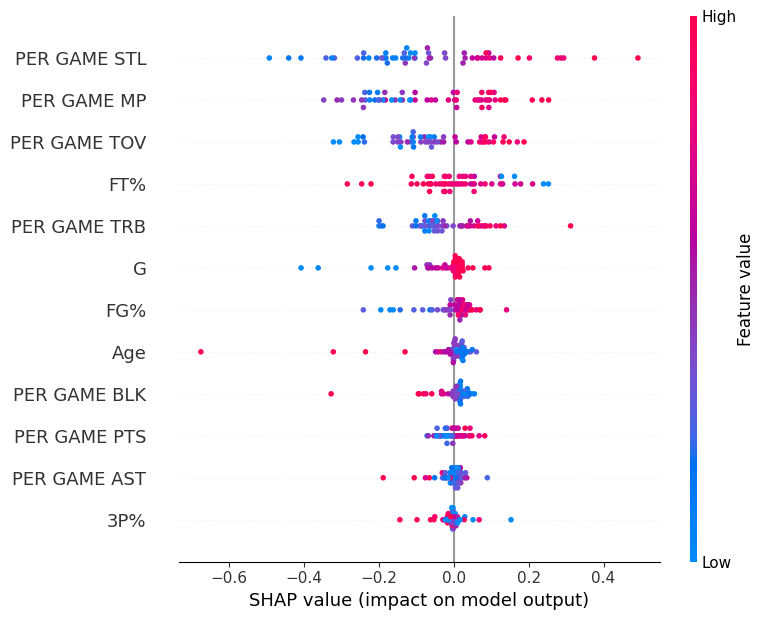

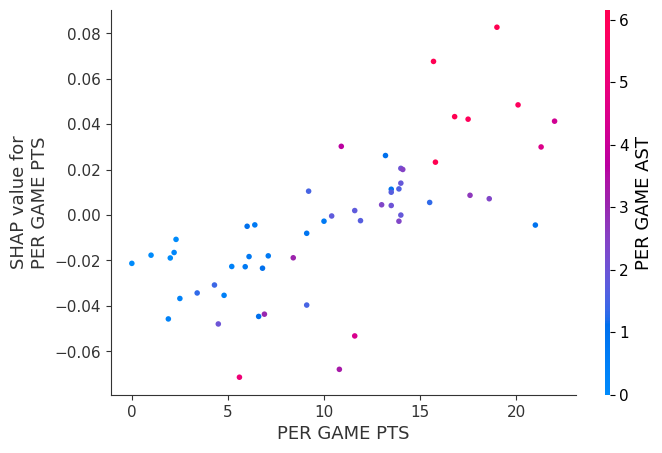

In [33]:
# Import necessary libraries
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# Load the dataset
file_path = 'Filtered_Rookie_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target variable
X = data[["Age", "G", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS",
          "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]]
y = data["high_success"]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTEENN to fix the class imbalance on the training set
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the SVM model with best parameters
svm_model = SVC(C=100, gamma=0.01, kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

# Step 5: Predict and evaluate the SVM model
y_pred = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# SHAP analysis using KernelExplainer
explainer = shap.KernelExplainer(svm_model.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP summary plot for Class 1
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP dependence plot for a key feature (e.g., PER GAME PTS) for Class 1
shap.dependence_plot("PER GAME PTS", shap_values, X_test, feature_names=X.columns)


Using 101 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.62      0.72      0.67        18

    accuracy                           0.76        55
   macro avg       0.74      0.75      0.74        55
weighted avg       0.78      0.76      0.77        55

Confusion Matrix:
[[29  8]
 [ 5 13]]


100%|██████████| 55/55 [01:04<00:00,  1.17s/it]


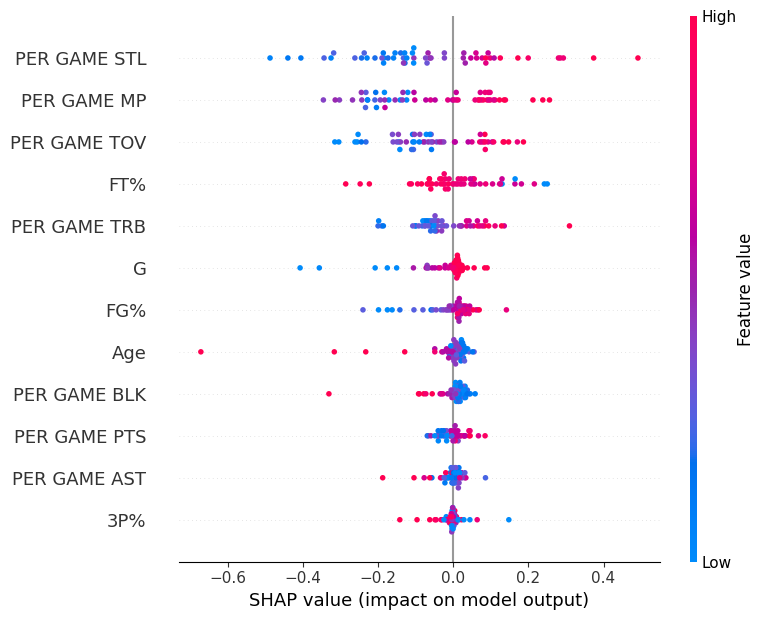

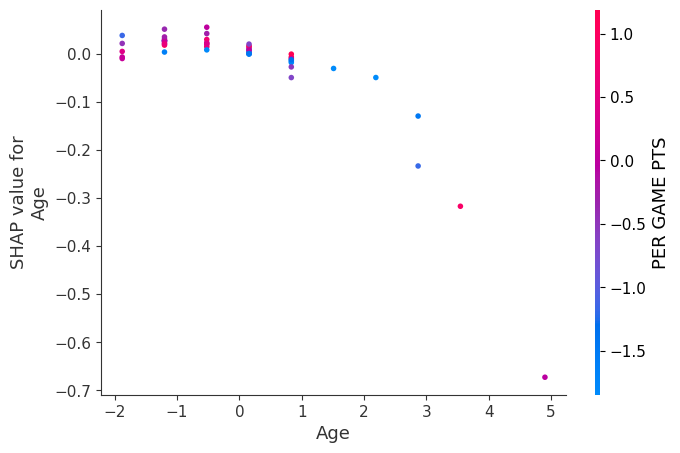

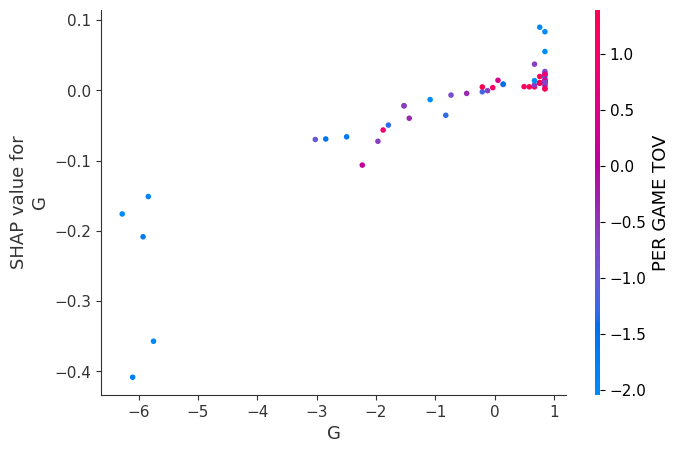

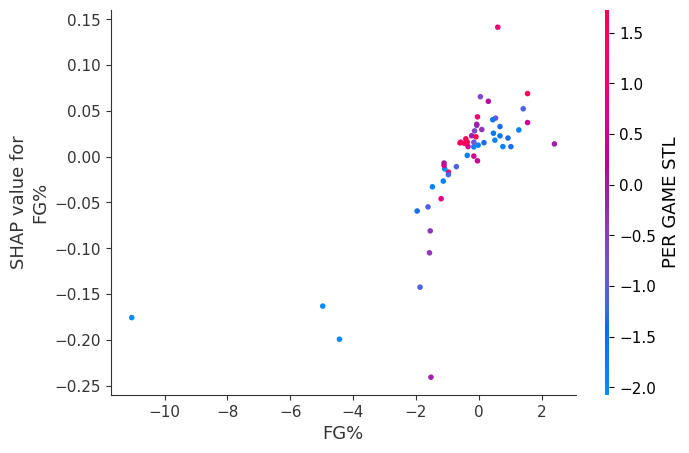

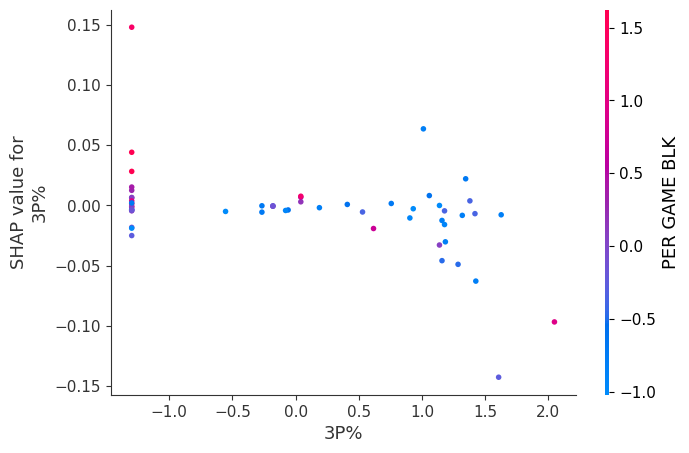

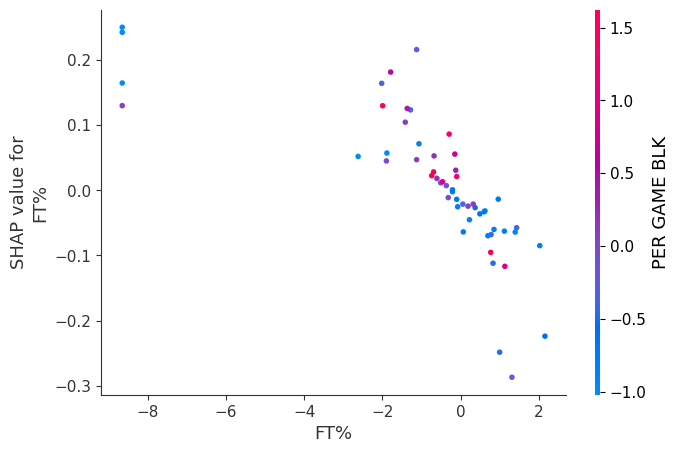

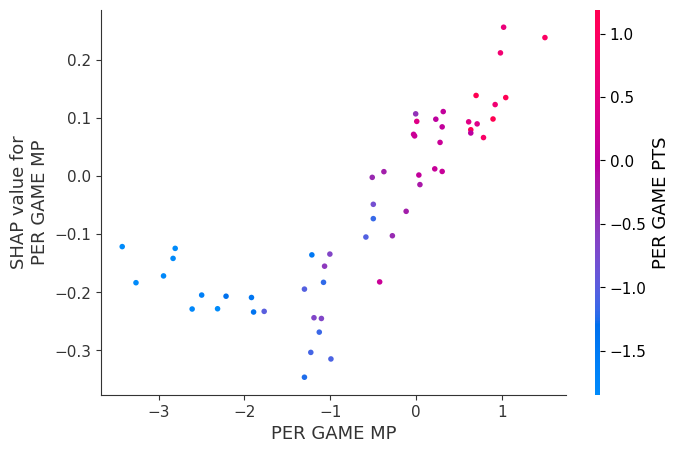

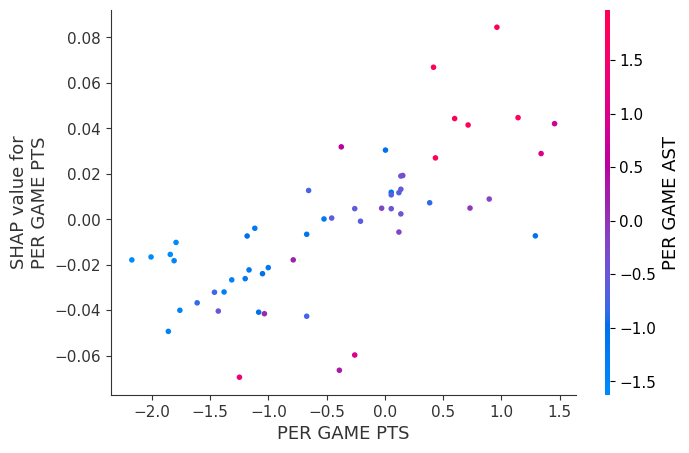

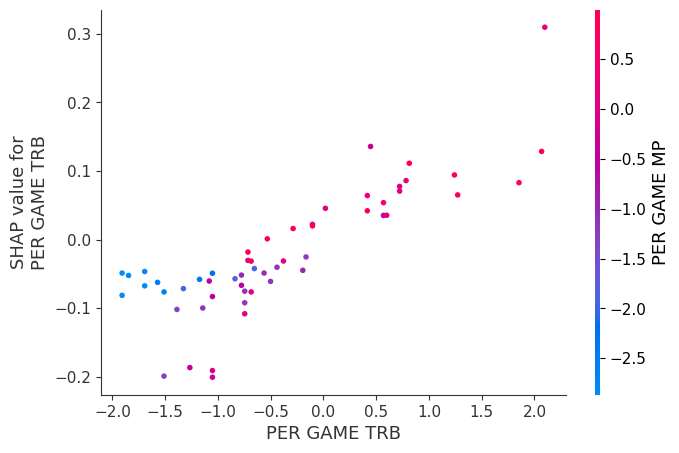

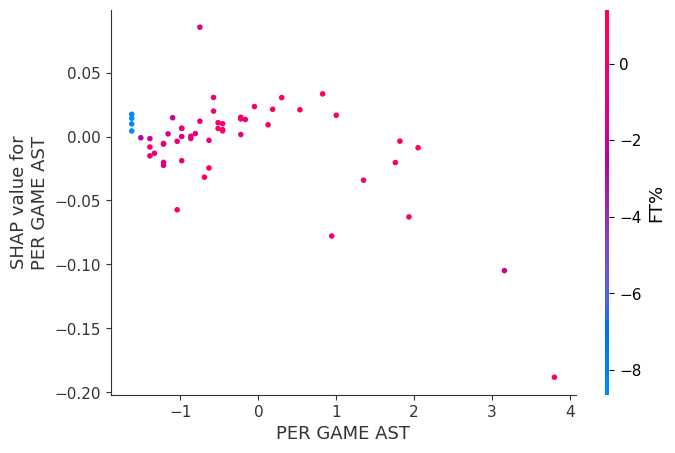

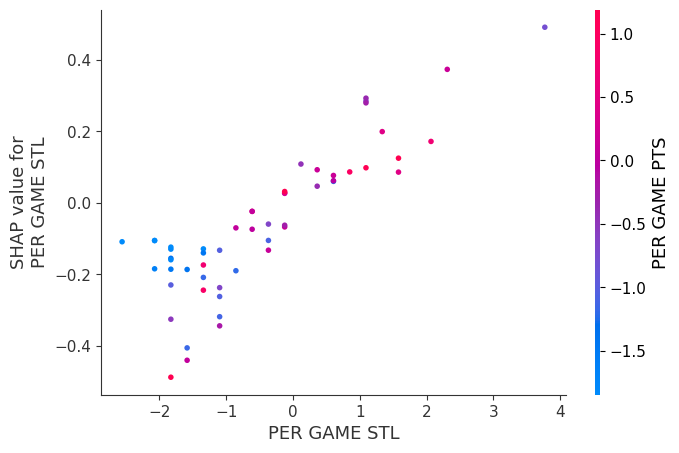

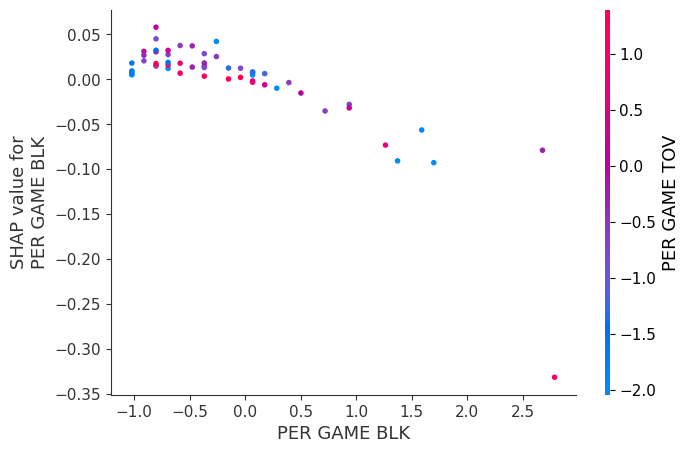

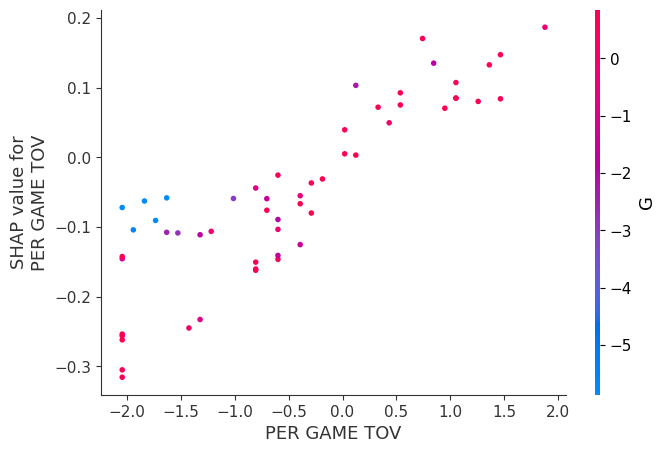

In [38]:
# Import necessary libraries
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# Load the dataset
file_path = 'Filtered_Rookie_Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select features and target variable
X = data[["Age", "G", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS",
          "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]]
y = data["high_success"]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTEENN to fix the class imbalance on the training set
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the SVM model with best parameters
svm_model = SVC(C=100, gamma=0.01, kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

# Step 5: Predict and evaluate the SVM model
y_pred = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# SHAP analysis using KernelExplainer
explainer = shap.KernelExplainer(svm_model.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP summary plot for Class 1
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# List of all features to create dependence plots for
all_features = [
    "Age", "G", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS",
    "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"
]

# Loop through each feature and create a dependence plot for Class 1 (High Success)
for feature in all_features:
    shap.dependence_plot(feature, shap_values, X_test_scaled, feature_names=X.columns)

# # Save SHAP dependence plots for all features
# for feature in all_features:
#     plt.figure()  # Create a new figure
#     shap.dependence_plot(feature, shap_values[..., 1], X_test, feature_names=X.columns)
#     plt.savefig(f"shap_dependence_{feature.replace(' ', '_')}.png")  # Save the plot as a PNG
#     plt.close()  # Close the plot to avoid overlapping

